In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
data=pd.read_csv('weather_data.csv')
weather_data=data.copy()



A.DATA PROCESSING

In [45]:
#chuyển cột 'datetime' sang định dạng thời gian và đặt cột 'datetime' làm index cho dataframe
def convert_datetime(weather_data):
    weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
    weather_data =weather_data.set_index(pd.DatetimeIndex(weather_data['datetime']))
    return weather_data
weather_data=convert_datetime(weather_data)
weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,icon,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
datetime,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,22.0,19.0,83.16,0.000,0,3.6,40.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 01:00:00,2018-01-01 01:00:00,21.9,19.4,86.13,2.989,100,3.6,79.0,78.6,8.6,0.0,NaN,0.0,"Rain, Partially cloudy",rain,NaN,NaN,NaN,NaN
2018-01-01 02:00:00,2018-01-01 02:00:00,21.0,19.0,88.39,0.000,0,3.6,350.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 03:00:00,2018-01-01 03:00:00,21.0,20.0,94.04,0.000,0,0.0,0.0,78.6,5.0,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN
2018-01-01 04:00:00,2018-01-01 04:00:00,21.1,19.9,92.80,0.000,0,0.0,360.0,78.6,8.6,0.0,NaN,0.0,Partially cloudy,partly-cloudy-night,NaN,NaN,NaN,NaN


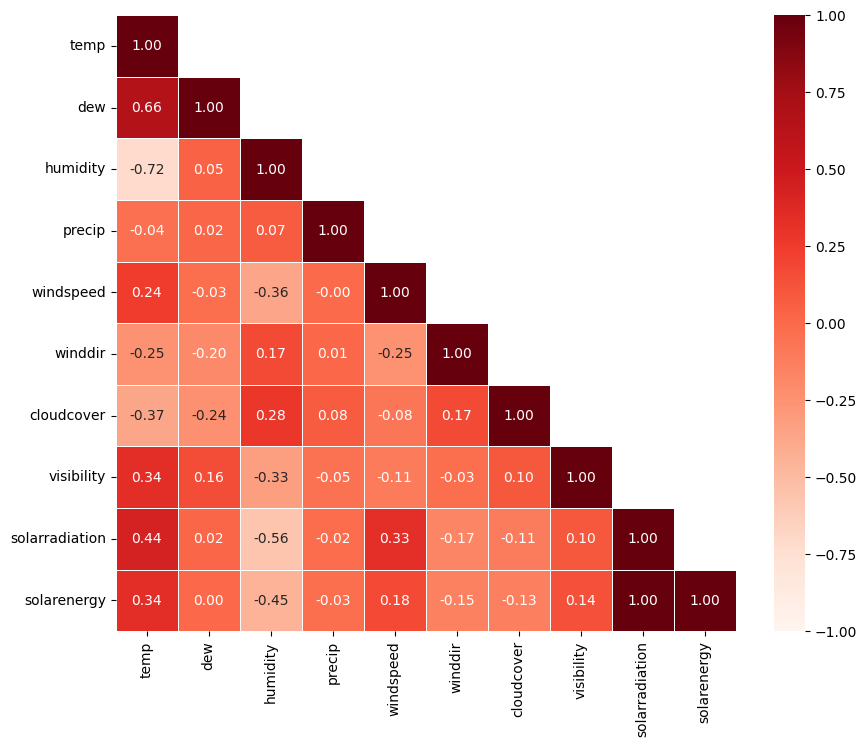

In [46]:
weather_data_y=pd.DataFrame(weather_data[['conditions','precipprob']])
weather_data=pd.DataFrame(weather_data[['temp','dew','humidity','precip','windspeed','winddir','cloudcover','visibility','solarradiation','solarenergy']])

#su tương quan giua cac bien trong du lieu 
weather_corr=weather_data.corr()

one_corr=np.ones_like(weather_corr,dtype=bool)
#tạo một mảng  toàn số 1 mới có kích thước giống với weather_corr
mask=np.triu(one_corr,1)
## lấy phần tử trên và phía trên đường chéo chính và đặt các phần tử khác bằng 0

mask_new=mask[1:,1:-2]

fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(data=weather_corr,mask=mask,annot=True,fmt=".2f",cmap="Reds",vmin=-1,vmax=1
            ,linecolor="white",linewidths=0.5,ax=ax)
plt.show()
#tạo ra biểu đồ nhiệt từ ma trận weather_corr và sử dụng mask để che dấu các phần tử nằm trên và phía trên đường chéo chính

<Axes: >

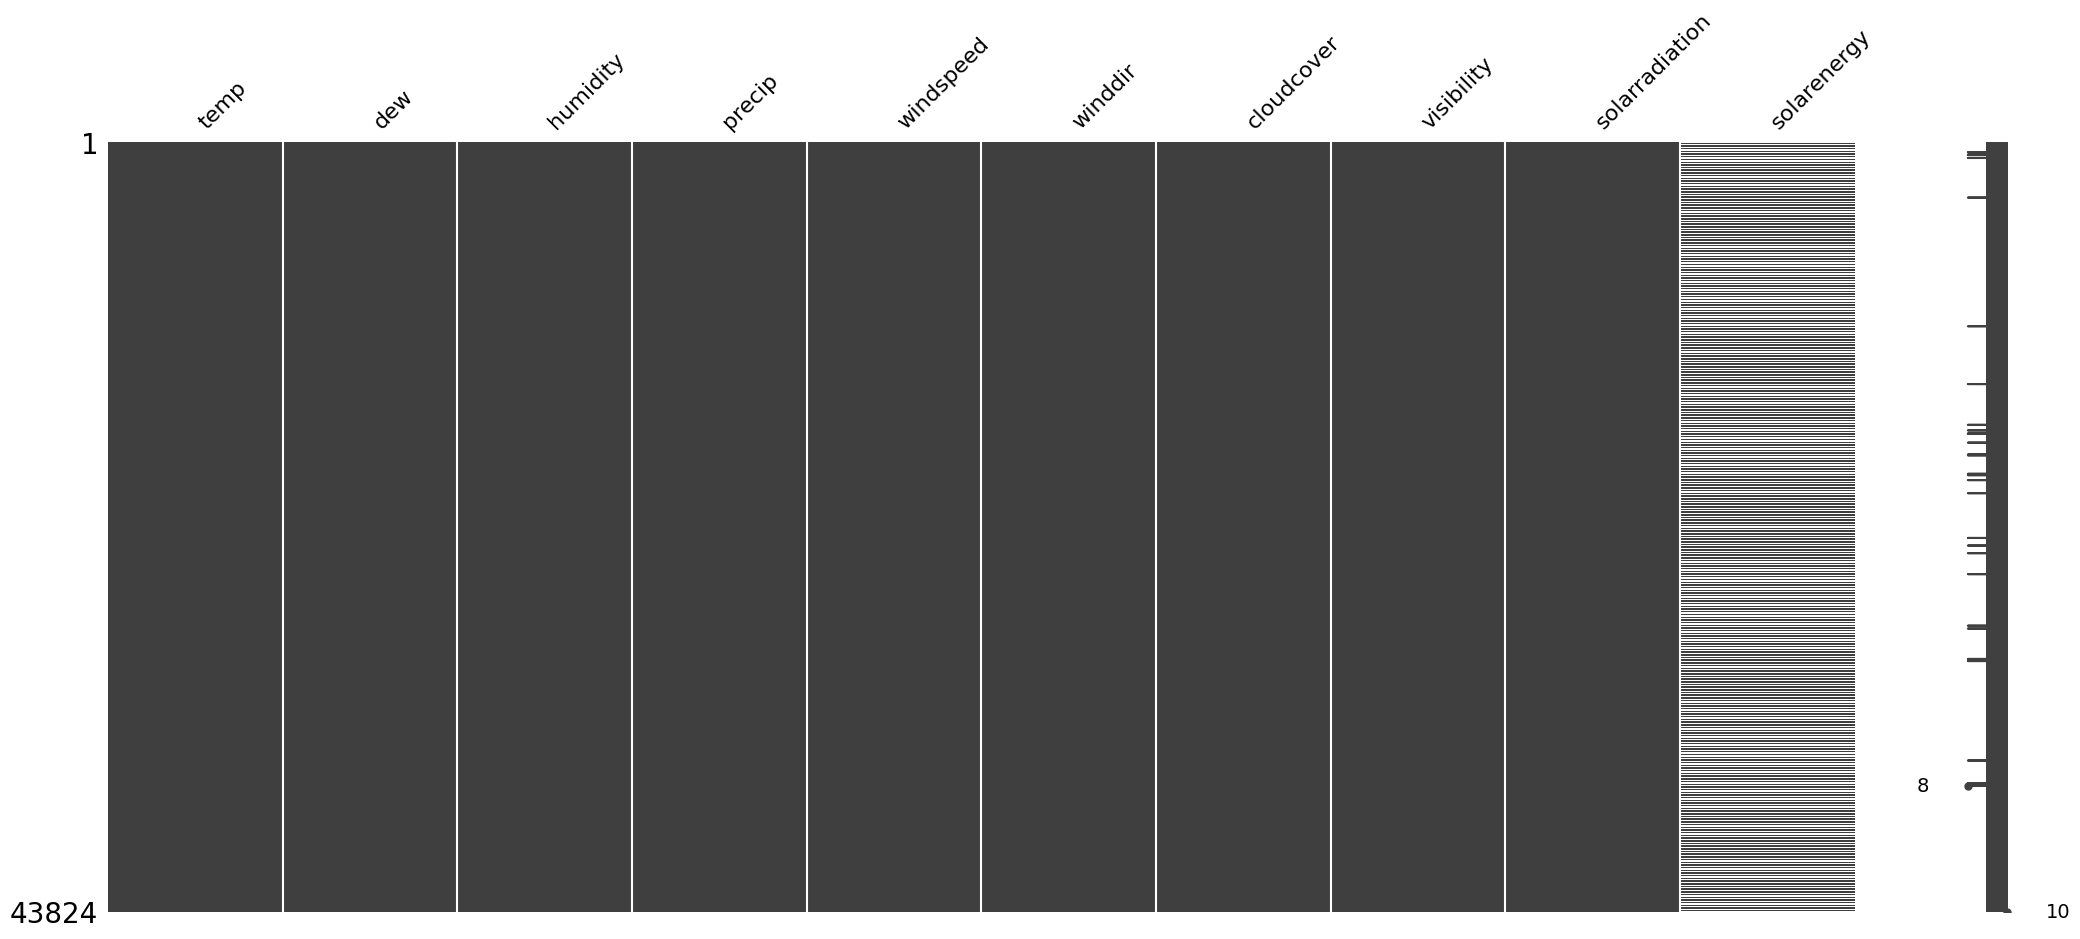

In [47]:
#xử lý dữ liệu trống
import missingno as msno
msno.matrix(weather_data)

In [48]:
def fill_nan(weather_data):
    weather_data['solarenergy']=weather_data['solarenergy'].fillna(0)
    weather_data['visibility']=weather_data['visibility'].fillna(weather_data['visibility'].mean())
    weather_data['solarradiation']=weather_data['solarradiation'].fillna(weather_data['solarradiation'].mean())
    return weather_data

weather_data=fill_nan(weather_data)
# print(weather_data[weather_data.isna().any(axis=1)])

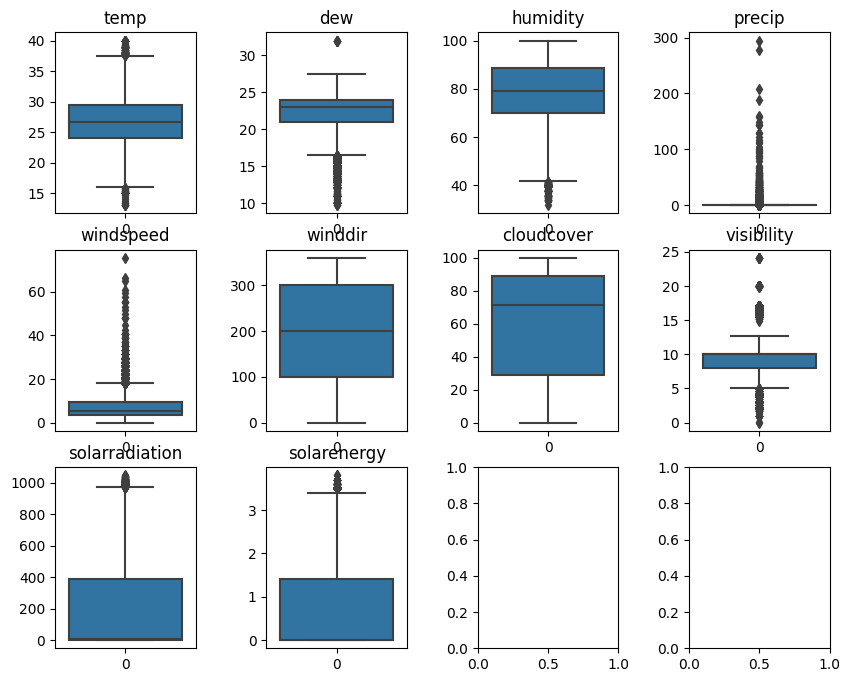

In [49]:
#Xử lý ngoại lệ

fig_boxplot,ax_boxplot=plt.subplots(3,4,figsize=(10,8))

for n, column in enumerate(weather_data.columns):
    j=n//4
    i=n%4
    sns.boxplot(data=weather_data[column].values, ax=ax_boxplot[j][i],labels=[column])
    ax_boxplot[j][i].set_title(column)

# Hiển thị biểu đồ
plt.subplots_adjust(wspace=0.5)
plt.show()

In [50]:
def process_outliers(weather_data):
    # outliers temp
    outliers_temp_upper = weather_data['temp'] >37
    weather_data.loc[outliers_temp_upper,'temp']=37

    outliers_temp_lowwer = weather_data['temp'] <17
    weather_data.loc[outliers_temp_lowwer,'temp']=17

    #ouliers dew
    # IQR_dew=weather_data.dew.quantile(0.75)-weather_data.dew.quantile(0.25)

    outliers_dew_upper=weather_data['dew']>weather_data['dew'].quantile(0.75)
    weather_data.loc[outliers_dew_upper,'dew']=weather_data['dew'].quantile(0.75)

    outliers_dew_lower=weather_data['dew']<weather_data['dew'].quantile(0.25)
    weather_data.loc[outliers_dew_lower,'dew']=weather_data['dew'].quantile(0.25)

    #outliers humidity

    outliers_humidity_lower=weather_data['humidity']<weather_data.humidity.quantile(0.25)
    weather_data.loc[outliers_humidity_lower,'humidity']=weather_data['humidity'].mean()

    #outliers windspeed
    outliers_windspeed_upper=weather_data['windspeed']>weather_data.windspeed.quantile(0.75)
    weather_data.loc[outliers_windspeed_upper,'windspeed']=weather_data['windspeed'].quantile(0.75)

    #outliers visibility
    outliers_visibility_lower=weather_data['visibility']<5
    weather_data.loc[outliers_visibility_lower,'visibility']=5

    outliers_visibility_upper=weather_data['visibility']>weather_data.visibility.quantile(0.75)
    weather_data.loc[outliers_visibility_upper,'visibility']=weather_data.visibility.quantile(0.75)

    #outliers solarradiation
    outliers_solarradiation_upper=weather_data['solarradiation']>weather_data.solarradiation.quantile(0.75)
    weather_data.loc[outliers_solarradiation_upper,'solarradiation']=weather_data.solarradiation.quantile(0.75)

    return weather_data

weather_data=process_outliers(weather_data)


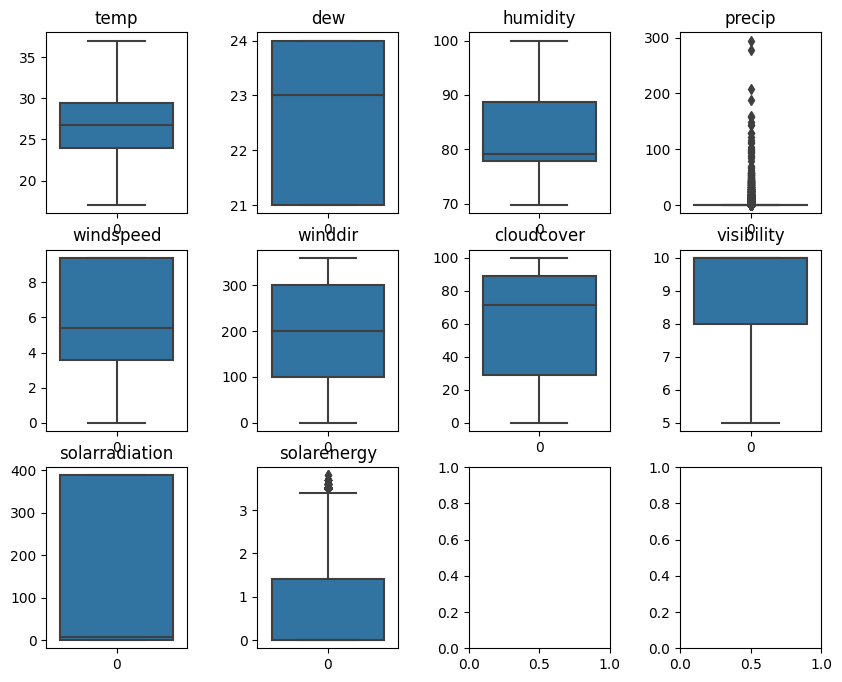

In [51]:
fig_boxplot,ax_boxplot=plt.subplots(3,4,figsize=(10,8))

for n, column in enumerate(weather_data.columns):
    j=n//4
    i=n%4
    sns.boxplot(data=weather_data[column].values, ax=ax_boxplot[j][i],labels=[column])
    ax_boxplot[j][i].set_title(column)

# Hiển thị biểu đồ
plt.subplots_adjust(wspace=0.5)
plt.show()

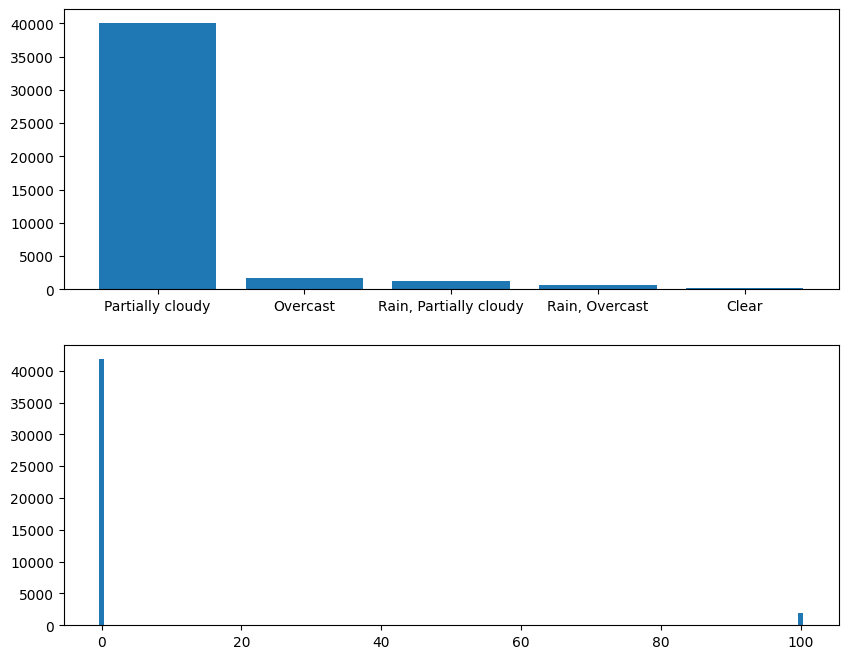

In [52]:
count_condition = weather_data_y['conditions'].value_counts()
count_precipprob=weather_data_y['precipprob'].value_counts()
# Tạo biểu đồ cột
fig_count,(ax_count1,ax_count2)=plt.subplots(2,1,figsize=(10,8))
ax_count1.bar(count_condition.index, count_condition.values)
ax_count2.bar(count_precipprob.index, count_precipprob.values)
plt.show()

In [53]:
weather_data_y['conditions'].describe()

count                43824
unique                   5
top       Partially cloudy
freq                 40122
Name: conditions, dtype: object

array([[<Axes: title={'center': 'conditions'}>,
        <Axes: title={'center': 'precipprob'}>]], dtype=object)

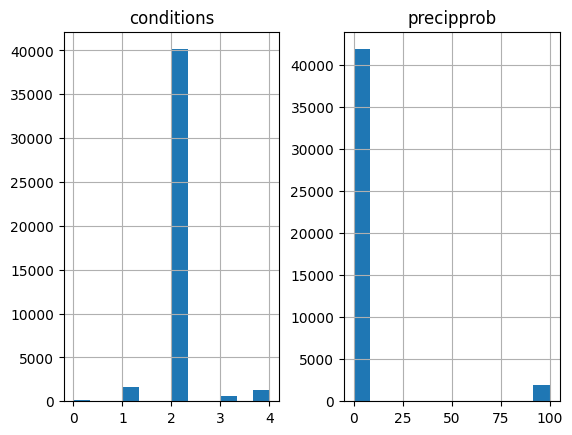

In [54]:
#xử lý dữ liệu string
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


weather_data_y['conditions'] =encoder.fit_transform(weather_data_y['conditions'])
# weather_data_y['icon'] =encoder.fit_transform( weather_data_y['icon'])



weather_data_y.loc[weather_data_y['conditions']==100,'conditions']=1

weather_data_y.hist(bins=12)



condition:
{'Partially cloudy':2,  'Overcast':1, 'Rain, Partially cloudy':4 ,'Rain, Overcast':3 ,'clear':0}

icon:

{'partly-cloudy-day':4  ,partly-cloudy-night:5 ,rain:6  ,,'cloudy': 2 ,'clear-day': 0 'clear-night':1 'wind': 7,'fog': 3  }

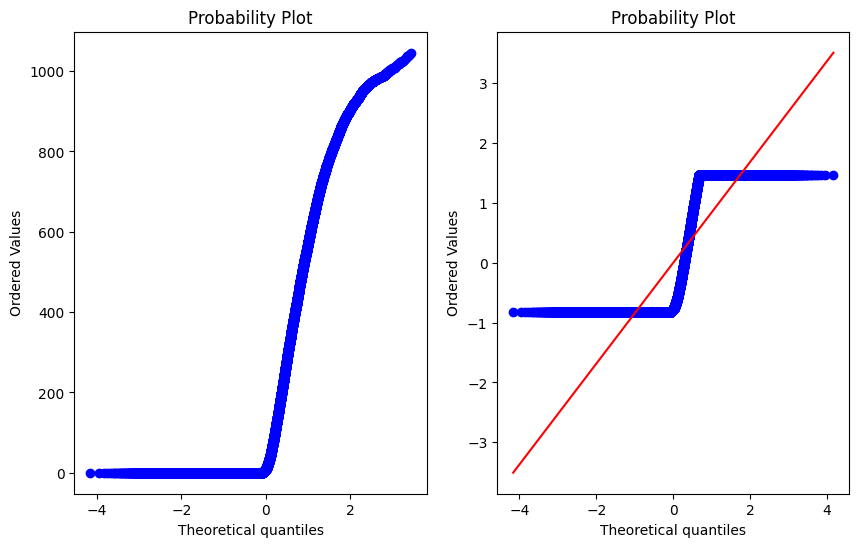

In [55]:
#chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler,Normalizer
import scipy.stats as stat
def plot_data(weather_data,weather_data_standardized,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    stat.probplot(weather_data[feature],plot=plt)# prob plot
    plt.subplot(1,2,2)
    stat.probplot(weather_data_standardized[feature],plot=plt)# prob plot
    plt.show()

def fit_transform(X):
    X_fit=pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns,index=X.index)
    return X_fit

weather_data_standardized=fit_transform(weather_data)
plot_data(data,weather_data_standardized,'solarradiation')

In [56]:
# lựa chọn đặc trưng 
from sklearn.feature_selection import VarianceThreshold

VarianceThreshold(0.9).fit_transform(weather_data_standardized).shape

# =>> ta thấy dữ liệu đều biến động lớn
#->> sẽ dùng grid search

(43824, 10)

In [105]:
# Select training and testing data

train_start_date = '2018-01-01'
train_end_date = '2021-12-31'
test_start_date = '2022-01-01'
test_end_date = '2022-12-31'


X_train_data = weather_data_standardized.loc[train_start_date:train_end_date]
y_train_conditions=weather_data_y['conditions'].loc[train_start_date:train_end_date]
y_train_precipprob=weather_data_y['precipprob'].loc[train_start_date:train_end_date]


X_test_data = weather_data_standardized.loc[test_start_date:test_end_date]
y_test_conditions = weather_data_y['conditions'].loc[test_start_date:test_end_date]
y_test_precipprob = weather_data_y['precipprob'].loc[test_start_date:test_end_date]

X_train_data_5d=X_train_data[:len(y_train_conditions)-120]


y_train_conditions_5d=y_train_conditions[120:]

y_train_precipprob_5d=y_train_precipprob[120:]





In [106]:

X_train_precipprob_drop=X_train_data_5d.drop('precip',axis=1)
X_test_precipprob_drop=X_test_data.drop('precip',axis=1)
X_train_precipprob_1h_drop=X_train_data.drop('precip',axis=1)

n_features_precipprob=X_train_precipprob_drop.shape[1]

X_train_precipprob_5d=X_train_precipprob_drop[24:]
y_train_precipprob_5d=y_train_precipprob_5d[24:]

X_train_precipprob_5d = X_train_precipprob_5d.values.reshape((-1, 120, n_features_precipprob))
X_test_precipprob_5d = X_test_precipprob_drop.values.reshape((-1, 120, n_features_precipprob))

y_train_precipprob_5d=y_train_precipprob_5d.values.reshape((-1,120,1))
y_test_precipprob_5d=y_test_precipprob.values.reshape((-1,120,1))

y_train_precipprob.shape

(35064,)

In [110]:
X_train_precipprob_1h=X_train_precipprob_1h_drop[:len(X_train_precipprob_1h_drop)-1]
y_train_precipprob_1h=y_train_precipprob[1:]

X_train_precipprob_1h = X_train_precipprob_1h.values.reshape((-1, 1, n_features_precipprob))
X_test_precipprob_1h = X_test_precipprob_drop.values.reshape((-1, 1, n_features_precipprob))

y_train_precipprob_1h=y_train_precipprob_1h.values.reshape((-1,1,1))
y_test_precipprob_1h=y_test_precipprob.values.reshape((-1,1,1))

y_train_precipprob_1h.shape


(35063, 1, 1)

(291, 120, 9)
(73, 120, 9)

X_train_data.shape:(35064, 11)
y_train_data.shape: (35064, 2)

B
B.1 Data Preparation

In [111]:
n_features_conditions = X_train_data_5d.shape[1]

X_train_conditions_5d=X_train_data_5d[24:]
y_train_conditions_5d=y_train_conditions_5d[24:]

X_train_conditions_5d = X_train_conditions_5d.values.reshape((-1, 120, n_features_conditions))
X_test_conditions_5d = X_test_data.values.reshape((-1, 120, n_features_conditions))

y_train_conditions_5d=y_train_conditions_5d.values.reshape((-1,120,1))
y_test_conditions_5d=y_test_conditions.values.reshape((-1,120,1))


X_train_conditions_5d.shape

(291, 120, 10)

(292, 120, 1)

In [61]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import math
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam


model = Sequential()

model.add(LSTM(50,activation='tanh', input_shape=(X_train_conditions_5d.shape[1], X_train_conditions_5d.shape[2])))

model.add(Dense(120))

# model.add(LSTM(50,activation='tanh'))

optimizer=Adam(lr=0.0001)

model.compile(loss='mse', optimizer=optimizer)

model.fit(X_train_conditions_5d,y_train_conditions_5d, epochs=100, batch_size=72,verbose=2, shuffle=False)

y_test_pred_condition_5d = model.predict(X_test_conditions_5d)

# test_rmse = mean_squared_error(y_test_data, y_test_pred)
# print("Test RMSE: ", test_rmse)
# y_pred= model.predict(X_test)


Epoch 1/100


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


5/5 - 3s - loss: 4.3056 - 3s/epoch - 561ms/step
Epoch 2/100
5/5 - 1s - loss: 4.2933 - 894ms/epoch - 179ms/step
Epoch 3/100
5/5 - 1s - loss: 4.2822 - 749ms/epoch - 150ms/step
Epoch 4/100
5/5 - 1s - loss: 4.2711 - 841ms/epoch - 168ms/step
Epoch 5/100
5/5 - 1s - loss: 4.2599 - 961ms/epoch - 192ms/step
Epoch 6/100
5/5 - 1s - loss: 4.2486 - 967ms/epoch - 193ms/step
Epoch 7/100
5/5 - 1s - loss: 4.2370 - 970ms/epoch - 194ms/step
Epoch 8/100
5/5 - 1s - loss: 4.2253 - 973ms/epoch - 195ms/step
Epoch 9/100
5/5 - 1s - loss: 4.2132 - 966ms/epoch - 193ms/step
Epoch 10/100
5/5 - 1s - loss: 4.2008 - 970ms/epoch - 194ms/step
Epoch 11/100
5/5 - 1s - loss: 4.1880 - 960ms/epoch - 192ms/step
Epoch 12/100
5/5 - 1s - loss: 4.1748 - 729ms/epoch - 146ms/step
Epoch 13/100
5/5 - 1s - loss: 4.1611 - 977ms/epoch - 195ms/step
Epoch 14/100
5/5 - 1s - loss: 4.1468 - 1s/epoch - 203ms/step
Epoch 15/100
5/5 - 1s - loss: 4.1320 - 1s/epoch - 205ms/step
Epoch 16/100
5/5 - 1s - loss: 4.1165 - 766ms/epoch - 153ms/step
Epoch 

In [62]:

model1 = Sequential()

model1.add(LSTM(50, input_shape=(X_train_precipprob_5d.shape[1], X_train_precipprob_5d.shape[2])))

model1.add(Dense(120,activation='sigmoid'))

# model.add(LSTM(50,activation='tanh'))

optimizer1=Adam(lr=0.001)

model1.compile(loss='mse', optimizer=optimizer1)

model1.fit(X_train_precipprob_5d,y_train_precipprob_5d, epochs=100, batch_size=72,verbose=2, shuffle=False)

y_test_pred_pre_5d = model1.predict(X_test_precipprob_5d)

Epoch 1/100
5/5 - 3s - loss: 432.8375 - 3s/epoch - 502ms/step
Epoch 2/100
5/5 - 1s - loss: 432.7343 - 807ms/epoch - 161ms/step
Epoch 3/100
5/5 - 1s - loss: 432.6338 - 922ms/epoch - 184ms/step
Epoch 4/100
5/5 - 1s - loss: 432.5108 - 955ms/epoch - 191ms/step
Epoch 5/100
5/5 - 1s - loss: 432.3460 - 922ms/epoch - 184ms/step
Epoch 6/100
5/5 - 1s - loss: 432.1081 - 909ms/epoch - 182ms/step
Epoch 7/100
5/5 - 1s - loss: 431.7459 - 896ms/epoch - 179ms/step
Epoch 8/100
5/5 - 1s - loss: 431.1801 - 585ms/epoch - 117ms/step
Epoch 9/100
5/5 - 0s - loss: 430.4943 - 493ms/epoch - 99ms/step
Epoch 10/100
5/5 - 1s - loss: 430.0276 - 853ms/epoch - 171ms/step
Epoch 11/100
5/5 - 1s - loss: 429.6794 - 573ms/epoch - 115ms/step
Epoch 12/100
5/5 - 0s - loss: 429.4095 - 329ms/epoch - 66ms/step
Epoch 13/100
5/5 - 0s - loss: 429.2142 - 282ms/epoch - 56ms/step
Epoch 14/100
5/5 - 0s - loss: 429.0788 - 301ms/epoch - 60ms/step
Epoch 15/100
5/5 - 0s - loss: 428.9857 - 240ms/epoch - 48ms/step
Epoch 16/100
5/5 - 0s - los

In [112]:
model_1h = Sequential()

model_1h.add(LSTM(50, input_shape=(X_train_precipprob_1h.shape[1], X_train_precipprob_1h.shape[2])))

model_1h.add(Dense(1,activation='sigmoid'))

# model.add(LSTM(50,activation='tanh'))

optimizer1=Adam(lr=0.001)

model_1h.compile(loss='mse', optimizer=optimizer1)

model_1h.fit(X_train_precipprob_1h,y_train_precipprob_1h, epochs=50, batch_size=72,verbose=2, shuffle=False)

y_test_pred_pre_1h = model_1h.predict(X_test_precipprob_1h)

Epoch 1/50


c:\Users\nguye\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


487/487 - 2s - loss: 432.9164 - 2s/epoch - 4ms/step
Epoch 2/50
487/487 - 1s - loss: 431.8144 - 831ms/epoch - 2ms/step
Epoch 3/50
487/487 - 1s - loss: 431.7211 - 873ms/epoch - 2ms/step
Epoch 4/50
487/487 - 1s - loss: 431.6996 - 857ms/epoch - 2ms/step
Epoch 5/50
487/487 - 1s - loss: 431.6890 - 757ms/epoch - 2ms/step
Epoch 6/50
487/487 - 1s - loss: 431.6824 - 717ms/epoch - 1ms/step
Epoch 7/50
487/487 - 1s - loss: 431.6771 - 756ms/epoch - 2ms/step
Epoch 8/50
487/487 - 1s - loss: 431.6721 - 771ms/epoch - 2ms/step
Epoch 9/50
487/487 - 1s - loss: 431.6670 - 780ms/epoch - 2ms/step
Epoch 10/50
487/487 - 1s - loss: 431.6616 - 775ms/epoch - 2ms/step
Epoch 11/50
487/487 - 1s - loss: 431.6563 - 750ms/epoch - 2ms/step
Epoch 12/50
487/487 - 1s - loss: 431.6505 - 720ms/epoch - 1ms/step
Epoch 13/50
487/487 - 1s - loss: 431.6446 - 769ms/epoch - 2ms/step
Epoch 14/50
487/487 - 1s - loss: 431.6389 - 778ms/epoch - 2ms/step
Epoch 15/50
487/487 - 1s - loss: 431.6331 - 774ms/epoch - 2ms/step
Epoch 16/50
487/48

In [113]:
y_test_pred_pre_1h.shape

(8760, 1)

In [65]:
# np.max(y_test_pred_pre)

In [115]:
from sklearn.metrics import accuracy_score

y_test_conditions_ravel = y_test_conditions_5d.ravel()
y_test_precipprob_ravel=y_test_precipprob_5d.ravel()
y_test_precipprob_1h=y_test_precipprob_1h.ravel()

y_test_pred_condition_5d = y_test_pred_condition_5d.round().astype(int)
y_test_pred_pre=y_test_pred_pre_5d.round().astype(int)
y_test_pred_pre_1h_round=y_test_pred_pre_1h.round().astype(int)

y_pred_conditions_ravel = y_test_pred_condition_5d.ravel()
y_test_pred_pre=y_test_pred_pre.ravel()
y_test_pred_pre_1h_round=y_test_pred_pre_1h_round.ravel()

# y_pred_conditions_ravel.reshape(8760,)

accuracy = accuracy_score(y_test_conditions_ravel, y_pred_conditions_ravel)
accuracy_pre_5d=accuracy_score(y_test_precipprob_ravel,y_test_pred_pre)

accuracy_pre_1h=accuracy_score(y_test_pred_pre_1h_round,y_test_precipprob_1h)
# np.savetxt('data.csv', y_test_pred, delimiter=',')
print(accuracy)
print(accuracy_pre_5d)
print(accuracy_pre_1h)



0.8583333333333333
0.7162100456621004
0.14406392694063927


(8760,)


In [67]:
# y_test_flat
# y_test_=np.array_split(y_test_flat, 365)
# y_pred_=np.array_split(y_pred_flat, 365)
# y_test_

In [68]:
# y_pred_=np.array_split(y_pred_flat, 365)
# y_pred_

In [69]:

weather_data_y_test=weather_data_y.loc['2022']
decoded_labels_pred = encoder.inverse_transform(y_pred_conditions_ravel)
df_y_pred=pd.DataFrame({'conditions_pred': decoded_labels_pred, 'conditions_test': encoder.inverse_transform(y_test_conditions_ravel)},index=weather_data_y_test.index)

df_y_pred


,conditions_pred,conditions_test
datetime,,
2022-01-01 00:00:00,Partially cloudy,Partially cloudy
2022-01-01 01:00:00,"Rain, Overcast",Partially cloudy
2022-01-01 02:00:00,Partially cloudy,Partially cloudy
2022-01-01 03:00:00,Partially cloudy,Partially cloudy
2022-01-01 04:00:00,Partially cloudy,Partially cloudy
...,...,...
2022-12-31 19:00:00,Partially cloudy,Partially cloudy
2022-12-31 20:00:00,Partially cloudy,Partially cloudy
2022-12-31 21:00:00,Partially cloudy,Partially cloudy


In [70]:
weather_data_2023=pd.read_csv('T3_2023.csv')
weather_data_2023=convert_datetime(weather_data_2023)

def result_future(weather_data_2023):
    weather_data_2023=pd.concat([weather_data_2023[:120],weather_data],ignore_index=False)

    data_last_y=pd.DataFrame(weather_data_2023[['conditions','precipprob']])
    X_data_last=pd.DataFrame(weather_data_2023[['temp','dew','humidity','precip','windspeed','winddir','cloudcover','visibility','solarradiation','solarenergy']])
   

    X_data_last=fill_nan(X_data_last)
    X_data_last=process_outliers(X_data_last)

    X_data_last_nor=fit_transform(X_data_last)
    X_data_last_precipprob=X_data_last_nor.drop('precip',axis=1)

    encoder2023 = LabelEncoder()
    data_last_y['conditions'] =encoder2023.fit_transform(data_last_y['conditions'])
    # data_last_y['icon'] =encoder.fit_transform( data_last_y['icon'])


    
    data_last_y.loc[data_last_y['conditions']==100,'conditions']=1
    n=X_data_last_nor.shape[1]
    n1=X_data_last_precipprob.shape[1]

    X_data_last_ = X_data_last_nor[:120].values.reshape((-1, 120, n))
    X_data_last_precipprob=X_data_last_precipprob[:120].values.reshape((-1,120,n1))

    result=model.predict(X_data_last_)
    result=result.ravel()
    result = result.round().astype(int)
    result= encoder.inverse_transform(result)

    result_precipprob=model1.predict(X_data_last_precipprob)
    result_precipprob=result_precipprob.ravel()
  
 
    df_future=pd.DataFrame({'conditions_future': result,'precipprob_future':result_precipprob*100},index=X_data_last_nor[:120].index)
    return df_future

df_future=result_future(weather_data_2023)
df_future

1/1 [==============================] - 0s 19ms/step


,conditions_future,precipprob_future
datetime,,
2023-02-11 00:00:00,Partially cloudy,1.405398
2023-02-11 01:00:00,Partially cloudy,99.837234
2023-02-11 02:00:00,Overcast,27.933508
2023-02-11 03:00:00,Partially cloudy,1.621088
2023-02-11 04:00:00,Partially cloudy,27.767706
...,...,...
2023-02-15 19:00:00,Partially cloudy,99.860504
2023-02-15 20:00:00,Partially cloudy,1.088422
2023-02-15 21:00:00,Partially cloudy,27.671709


In [71]:
# X_day_train = X_test[55:60, :, :]

# y_day_pred=model.predict(X_day_train)
# y_day_pred= np.squeeze(y_day_pred)

# y_day_test=y_test_conditions[61:66,:,:]
# y_day_pred=y_day_pred.round().astype(int)
# y_day_pred=y_day_pred.reshape(600,)
# y_day_test=y_day_test.reshape(-1)

# print(accuracy_score(y_day_pred,y_day_test))
# y_day_pred= encoder.inverse_transform(y_day_pred)
# y_day_pred
